# Assignment

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [105]:
import pandas as pd

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("../data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? <span style="color:red" float:right>[1 point]</span>

In [106]:
# Columns
print("Data frame columns:")
to_print = churn.columns[0]
for column in churn.columns[1:]:
  to_print = to_print + " | " + column
print(to_print)
print("--------------------------------------------------------------------------------------------")
# Types
print("Data frame types:")
print(churn.dtypes)
print("--------------------------------------------------------------------------------------------")
# Distribution
print("Data distribution in the data frame for numeric values:")
print(churn.describe())
print("Data distribution in the data frame for non numeric values:")
print(churn["gender"].value_counts())
print(churn["address"].value_counts())
print(churn["timestamp"].value_counts())


Data frame columns:
user_id | gender | address | store_id | trans_id | timestamp | item_id | quantity | dollar
--------------------------------------------------------------------------------------------
Data frame types:
user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object
--------------------------------------------------------------------------------------------
Data distribution in the data frame for numeric values:
            user_id       store_id      trans_id       item_id       quantity  \
count  2.522040e+05  252204.000000  2.522040e+05  2.522040e+05  252204.000000   
mean   1.395660e+06  126101.500000  1.229771e+06  4.467833e+12       1.385692   
std    6.094769e+05   72805.167983  2.350992e+05  1.679512e+12       3.705732   
min    1.113000e+03       0.000000  8.177470e+05  2.000882e+07       1.000000   
25%    9.937150e+05  

2. Do the columns have the right types for the analysis? If not, convert them to the right type. <span style="color:red" float:right>[1 point]</span>

**Reasoning**: Let's convert `dollars` column from int to float number and `timestamp` to `datetime` type. 

In [107]:
# dollar column, int to float
churn["dollar"] = pd.to_numeric(churn["dollar"], downcast="float", errors="coerce")
# timestamp column, object to datetime
churn["timestamp"] = pd.to_datetime(churn["timestamp"])

**Conclusion**: now `dollar` column is of type `float64` and `timestamp` column is of type `datetime64[ns]`

3. Do any columns appear to have all rows with unique categories? How do we show that? <span style="color:red" float:right>[1 point]</span>

**Reasoning**: `unique()` method on a column gives us an array of unique values, then we can compare number of unique values to number of all numbers in a column

In [108]:

for column_name in churn.columns:
  if churn[column_name].unique().size == churn[column_name].size:
    print(f"All rows in '{column_name}' column are unique")
  else:
    print(f"Not all rows in '{column_name}' column are unique")

Not all rows in 'user_id' column are unique
Not all rows in 'gender' column are unique
Not all rows in 'address' column are unique
All rows in 'store_id' column are unique
All rows in 'trans_id' column are unique
Not all rows in 'timestamp' column are unique
Not all rows in 'item_id' column are unique
Not all rows in 'quantity' column are unique
Not all rows in 'dollar' column are unique


In [109]:
# !TODO  how do we show it?


**Conclusion**: We can print nicely what columns have unique values and what not. It appears that only `store_id` and `trans_id` have all unique rows 

4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - What is the date range covered by the data? <span style="color:red" float:right>[1 point]</span>  
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.

<!-- Questions -->
what quantity and valuem?

**Reasoning**: We can check if any column has negative values.

In [110]:
for column_name in churn.columns:
  try: 
    negative_values = churn[churn[column_name] < 0]
    if negative_values.size > 0:
      print(f"{column_name} column has negative values")
    else:
      print(f"{column_name} column doesn't have negative values")
  except TypeError:
    print(f"{column_name} ins't numeric type")

user_id column doesn't have negative values
gender ins't numeric type
address ins't numeric type
store_id column doesn't have negative values
trans_id column doesn't have negative values
timestamp ins't numeric type
item_id column doesn't have negative values
quantity column doesn't have negative values
dollar column doesn't have negative values


**Conclusions**: No columns have negative values

**Reasoning**:`timestamp` column was already converted to datetime. To find out a date range covered by data we can find earliest and lates timestamps and then figure out time difference between them 

In [111]:
# Now to find the range
min_date = churn['timestamp'].min()
max_date = churn['timestamp'].max()

print(f"The data ranges from {min_date} to {max_date}")

date_range = max_date - min_date
print(f"Date range coverage is {date_range}")

The data ranges from 2000-11-01 00:00:00 to 2001-02-28 00:00:00
Date range coverage is 119 days 00:00:00


**Conclusion**: We can perform operation subtraction on pandas datetime type, so it's not hard to calculate the difference between max and min value. Date range coverage appears to be 119 days 

5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - Are there items that are more commonly sold in bulk (quantity greater than 1)? <span style="color:red" float:right>[2 point]</span>
   - How do quantity and volume tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

**Reasoning**: In order to calculate the average number of transactions a user makes in a given week, we first need to map each transaction to the week in which it was made. We can use ISO standard for week numbers. Then when we know how many transaction a user made by a specific week we can calculate average number of transaction for a given week

In [112]:
# Create 'week' column which will represent a week number in ISO format with respect to 'timestamp' column
churn["week"] = churn["timestamp"].dt.isocalendar().week
# get number of transactions for a user by week
transactions_per_week = churn.groupby(['user_id', 'week']).size()
transactions_per_week
# group the transaction counts by 'user_id' and calculate the mean
average_transactions_per_week = transactions_per_week.groupby('user_id').mean()
print(average_transactions_per_week)

user_id
1113        4.500000
1250        7.000000
1823        4.666667
4947       18.000000
4978       11.500000
             ...    
2179315     2.000000
2179346    15.000000
2179414    36.000000
2179469     7.000000
2179605    52.000000
Length: 10000, dtype: float64


**Conclusion**: We see the average number of transaction a user made in a week.

**Reasoning**: To see items that are sold in bulks we can just mask our table with the condition when quantity is greater than 1, then get item_id column and apply unique function, to see only unique items that sold in bulk

In [126]:
items_sold_in_bulk = churn[churn['quantity'] > 1]["item_id"].unique()

print(items_sold_in_bulk)

churn["bulk_transaction"] = churn['quantity'] > 1

[4.7100000e+12 8.8000000e+12 4.7200000e+12 ... 2.0067724e+07 2.0530716e+07
 2.0539221e+07]
54810


**Conclusion**: We get an array of unique item ids sold in bulk. Added a colum which indicate weather items were sold in bulk in a give transaction.

**Conclusion**: 14835.5

6. Do the results mesh with what we expected? Note that to answer this we need to have some domain knowledge, so you can ignore this for the assignment. <span style="color:red" float:right>[0 point]</span>

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

**Reasoning**: We can pull out more data from what we already have. For example, we can look at what day of the week users usually buy things. We can also see how much money each user spends in total. Then, we can look at how many times and how much money each gender spends. By making a graph, we can see this information more clearly.

In [114]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

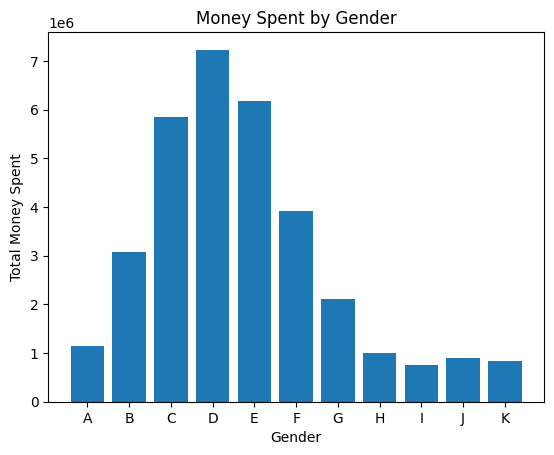

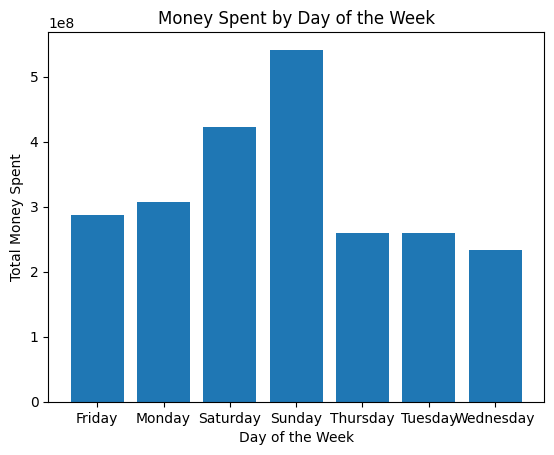

In [115]:
# day of the week when user buy items
churn["day"] = churn["timestamp"].dt.day_name()

# dollars spent 
churn["total_spent"] =  churn.groupby('user_id')['dollar'].transform('sum')

# money spend by gender
money_by_gender = churn.groupby("gender")["dollar"].sum()

plt.figure()  # New figure for first plot
plt.bar(money_by_gender.keys(), money_by_gender.values)
# Add labels and title
plt.xlabel('Gender')  # Set the x-axis label
plt.ylabel('Total Money Spent')  # Set the y-axis label
plt.title('Money Spent by Gender')  # Set the title
plt.show()  # Show the first plot

total_spend_by_day = churn.groupby("day")["total_spent"].sum()
plt.figure()  # New figure for second plot
plt.bar(total_spend_by_day.keys(), total_spend_by_day.values)
plt.xlabel('Day of the Week')  # Set the x-axis label
plt.ylabel('Total Money Spent')  # Set the y-axis label
plt.title('Money Spent by Day of the Week')  # Set the title
plt.show()  # Show the second plot

Conclusion: By adding more information and making graphs, we understand our data better. We can see patterns and trends that we might miss otherwise. This helps us understand what our customers do and can help us make better decisions for our business. From the graphs we can see that the most money spend gender D,E and C. And the most money is spent on Saturday and Sunday

In [116]:
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,week,bulk_transaction,day,total_spent
0,101981,F,E,2860,818463,2000-11-01,4.710000e+12,1,37.0,44,False,Wednesday,52444.0
1,101981,F,E,2861,818464,2000-11-01,4.710000e+12,1,17.0,44,False,Wednesday,52444.0
2,101981,F,E,2862,818465,2000-11-01,4.710000e+12,1,23.0,44,False,Wednesday,52444.0
3,101981,F,E,2863,818466,2000-11-01,4.710000e+12,1,41.0,44,False,Wednesday,52444.0
4,101981,F,E,2864,818467,2000-11-01,4.710000e+12,8,288.0,44,True,Wednesday,52444.0


8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

Reasoning: We're going to look at the connections between our data's features. We can do this by making a pairplot and a heatmap. A pairplot lets us see the relationships between different pairs of features. A heatmap helps us understand how much each pair of features relates to each other by showing us correlation coefficients. These methods can show us if there's any strong links between certain features in our data.

/home/lito/Learning/DataScience/Jupiter_DATASCI510A/.venv/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/lito/Learning/DataScience/Jupiter_DATASCI510A/.venv/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


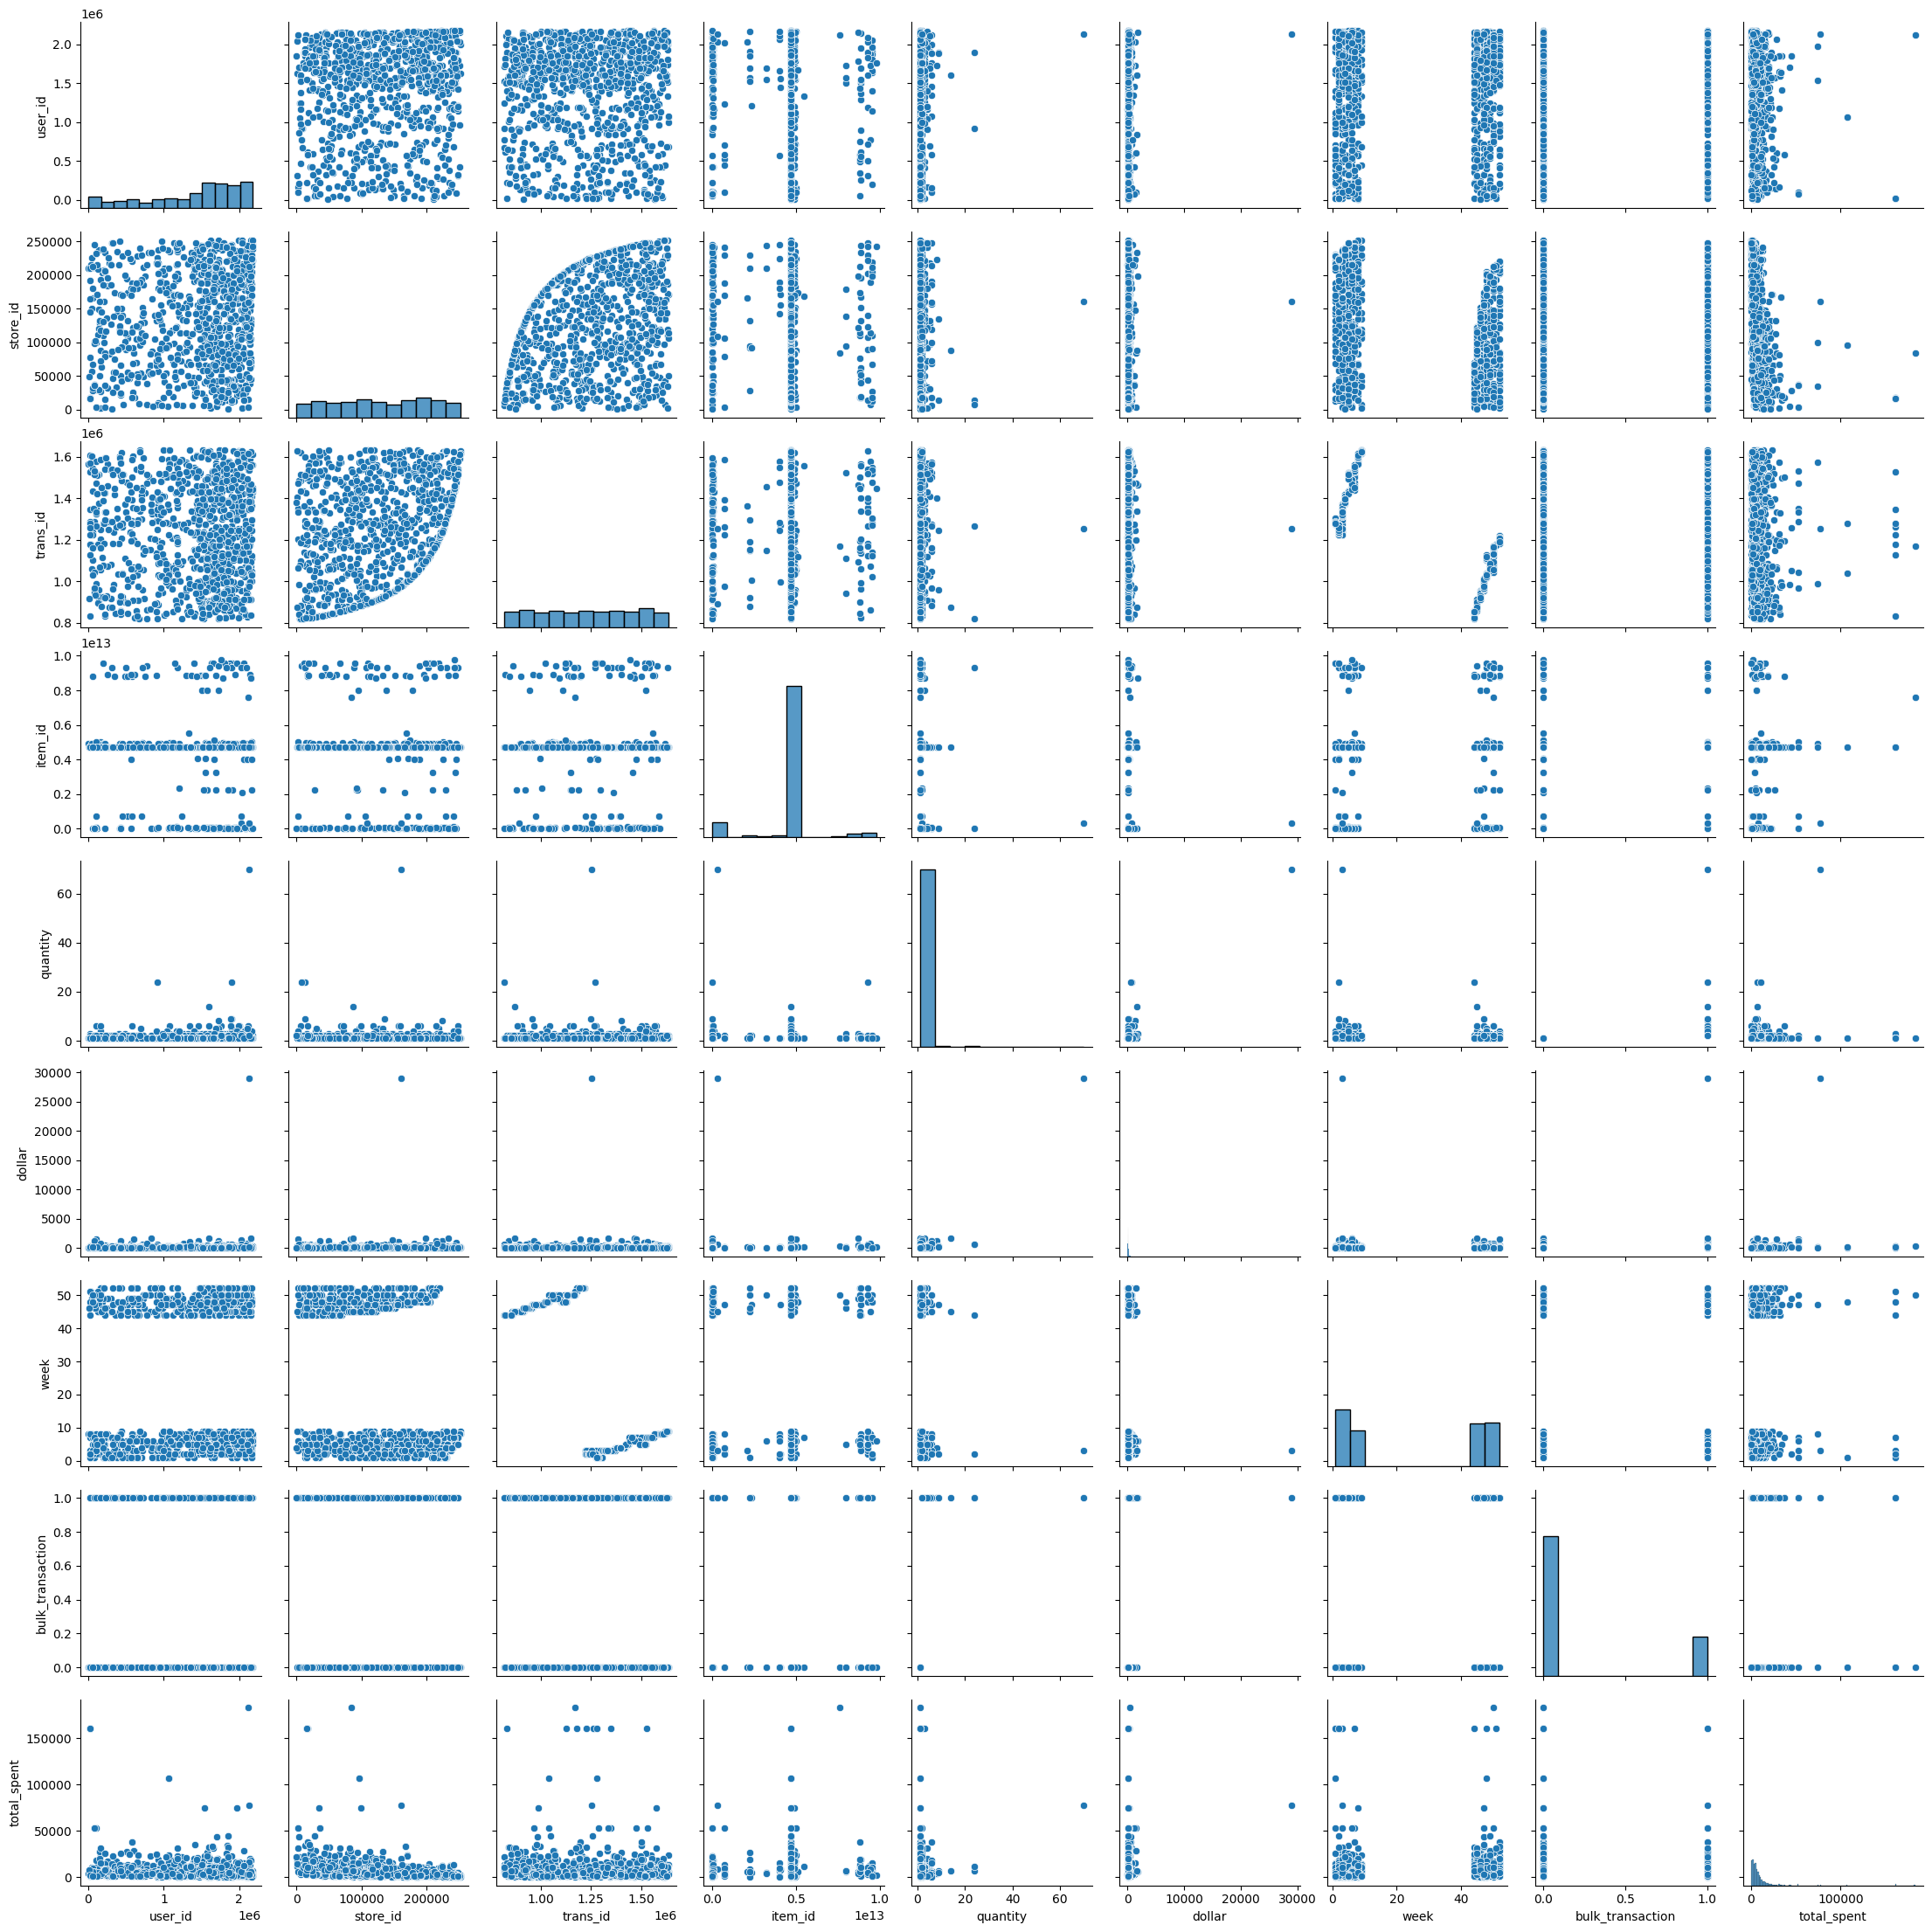

In [117]:
sns.pairplot(churn.sample(1000))

/tmp/ipykernel_305068/1323713428.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn.corr()*churn.corr())


<AxesSubplot: >

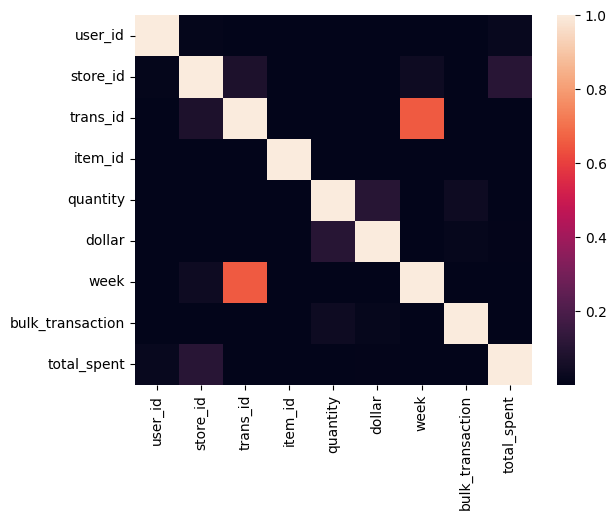

In [118]:
sns.heatmap(churn.corr()*churn.corr())

**Conclusion**: !TODO

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

In [119]:
from pandas_profiling import ProfileReport

profile = ProfileReport(churn, title="Transactions", explorative=True)

profile.to_file("./profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# End of assignment